# SVM Exercise
In this exercise, we will use the SVM optimizer provided by `sklearn` to explore using the kernel trick on the example given in the lecture.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from data import points, labels

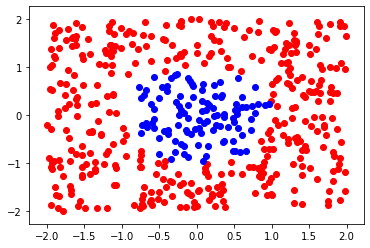

In [2]:
# Plot the data with lables
for (label, p) in zip(labels, points):
    plt.scatter(p[0], p[1], color="r" if label < 0 else "b")
plt.show()

## Kernel function
Recall from lectures that we can make the data linearly separable by using the map
$$
\phi(\vec x) = (x_1, x_2, x_1^2+x_2^2).
$$

Remember the form of the kernel $k(\vec x, \vec y)$ from the lecture and convince yourself that it is correct. Then implement it below. The [sklearn docs](https://scikit-learn.org/stable/modules/svm.html#svm-kernels) might be helpful here.

In [3]:
# Kernel function k
def k(x, y):
    mat = np.dot(x, y.T)
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            mat[i,j] += np.dot(x[i],x[i])*np.dot(y[j],y[j])
    return mat

In [4]:
# Train and use the classifier
clf = svm.SVC(kernel=k)
clf.fit(points, labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function k at 0x126332200>, max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

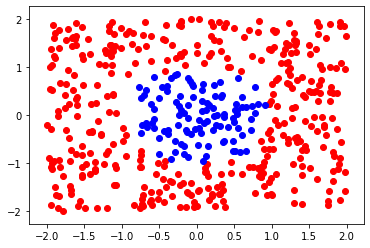

In [5]:
# Display predictions
labels_pred = clf.predict(points)
for (pred, p) in zip(labels_pred, points):
    plt.scatter(p[0], p[1], color="r" if pred < 0 else "b")
plt.show()